In [1]:
import geopandas as gpd
import rasterio
from rasterio import features
import matplotlib.pyplot as plt
import os, sys
import numpy as np

# Set up your filenames

In [2]:
shp_fn = r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\ZEEs\ZEE_Antares.shp'
rst_fn = r'C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\Anomalia_simples\Full_Year\Anomalia_Integrada_para_1_ano_45_2055.tif'
out_fn = str(os.path.abspath(shp_fn)[:-4]) + str('.tif')

print(out_fn)

C:\Doutorado\2_Trimestre\Disciplinas\Climatologia\ZEEs\ZEE_Antares.tif


In [3]:
# open the file with GeoPANDAS read_file

counties = gpd.read_file(shp_fn)

# Open the raster file you want to use as a template for feature burning using rasterio

In [4]:


rst = rasterio.open(rst_fn)

# copy and update the metadata from the input raster for the output

In [5]:
meta = rst.meta.copy()
meta.update(compress='lzw')

In [6]:
counties.keys()
counties['ID'] = (0)

for i in range(len(counties)):
    
    counties['ID'][i] = (i + 1)
counties.head(4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,Area,Tl_especif,Nome_Peixe,PPSAT_coun,PPSAT_sum,PPSAT_mean,PPSAT_min,PPSAT_max,ID,MAX_Anomal,MIN_Anomal,MEAN_Anoma,STD_Anomal,SUM_Anomal,geometry
0,Trindade,5.030717e+11,NaN,None,5850.0,1.892191e+06,323.451463,258.354034,406.260620,1,602,-3769,-437,980,-2556911,"POLYGON ((-32.9004205306 -20.4669796671, -32.8..."
1,Falkland Islands,8.955677e+11,NaN,None,10109.0,4.020786e+06,397.743241,132.797684,812.061096,2,6992,-1461,4283,1668,44585106,"POLYGON ((-65.0039325605 -51.3659626959, -64.6..."
2,Clipperton Island,4.413001e+11,NaN,None,5126.0,3.228076e+06,629.745521,560.985229,670.776611,3,-3582,-8657,-5875,1170,-30119660,"POLYGON ((-112.6230466049 10.2861223615, -112...."
3,Galapagos Islands,8.494094e+11,NaN,None,9780.0,7.823887e+06,799.988450,0.870926,1893.190796,4,-9546,-19856,-14477,2893,-142925769,"POLYGON ((-95.3457445888 1.6630853535, -95.296..."


# Now burn the features into the raster and write it out

## Nesta função, cada pixel da imagem Tiff de saída terá um valor (burned) igual ao valor do ID da geometria utilizada.

C:\ProgramData\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


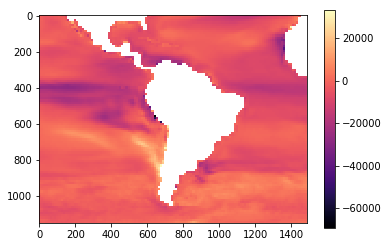

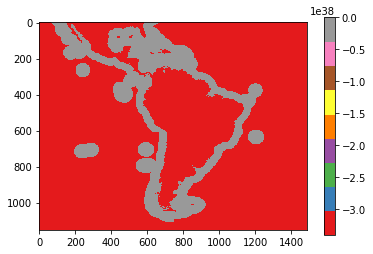

In [9]:
out= None
out_arr=None

Raster_base=None

with rasterio.open(out_fn, 'w', **meta) as out:
    out_arr = out.read(1)
    shapes = []
    # this is where we create a generator of geom, value pairs to use in rasterizing
    for geom, value in zip(counties.geometry, counties.ID):
        shapes.append((geom,value))
    
  
        
    print("\n\n\n")
    
    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform, dtype=np.float32)
    out.write_band(1, burned)
    
    Raster_base_DT = rasterio.open(rst_fn)

    Raster_base = Raster_base_DT.read(1)


    plt.imshow(Raster_base, cmap = 'magma')

    plt.colorbar()
    plt.show()
    
    
    plt.imshow(out_arr, cmap = 'Set1')
    plt.colorbar()
    
    plt.show()


In [10]:
print("Eis os shapes dos rasteres (base e burned): ", (Raster_base.shape) ,',', (out_arr.shape))

print("Max do array burned: ", np.max(out_arr))

out_arr = np.where(out_arr<(-0.1), np.nan, out_arr)



Raster_base=None

Raster_base_DT = rasterio.open(rst_fn)

Raster_base = Raster_base_DT.read(1)

Raster_base = np.nan_to_num(Raster_base)

print(np.max(Raster_base))

import os

Base_name = os.path.basename(rst_fn)

Base_name = Base_name[:-4]

counties['MAX_' + str(Base_name)] = (0)
counties['MIN_'+ str(Base_name)] = (0)
counties['MEAN_' + str(Base_name)] = (0)
counties['STD_' + str(Base_name)] = (0)
counties['SUM_' + str(Base_name)] = (0)

for i in range(len(counties)):
    ID = counties['ID'][i]
    ID = ID * 1.0
    
    out_arr_cor = np.where(out_arr==ID, 1.0, np.nan)
    
    Raster_Stat = Raster_base * out_arr_cor
    
    
    
    print(i+1, np.nanmax(Raster_Stat))
    
    counties['MAX_' + str(Base_name)][i] = np.nanmax(Raster_Stat)
    counties['MIN_'+ str(Base_name)][i] = np.nanmin(Raster_Stat)
    counties['MEAN_' + str(Base_name)][i] = np.nanmean(Raster_Stat)
    counties['STD_' + str(Base_name)][i] = np.nanstd(Raster_Stat)
    counties['SUM_' + str(Base_name)][i] = np.nansum(Raster_Stat)

    
   

Eis os shapes dos rasteres (base e burned):  (1152, 1488) , (1152, 1488)
Max do array burned:  58.0
33026.78
1 602.143798828125


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

2 6992.6474609375
3 -3582.72802734375
4 -9546.3125
5 2329.9931640625
6 2417.244384765625
7 1084.8529052734375
8 -5541.560546875
9 1090.9661865234375
10 1154.126708984375
11 888.544189453125
12 354.8160400390625
13 -232.83547973632812
14 -1074.385986328125
15 -966.0626220703125
16 -814.1959228515625
17 -2960.70263671875
18 -166.6941680908203
19 -240.16397094726562
20 -6085.3369140625
21 0.0
22 -4008.317626953125
23 -5044.68017578125
24 4140.0166015625
25 0.0
26 0.0
27 0.0
28 -2551.30712890625
29 0.0
30 3195.77490234375
31 0.0
32 -18522.4140625
33 0.0
34 0.0
35 16396.240234375
36 2417.0595703125
37 0.0
38 3107.99462890625
39 0.0
40 10632.083984375
41 0.0
42 -166.6941680908203
43 -688.5886840820312
44 8110.69189453125
45 0.0
46 -5583.873046875
47 -3557.569580078125
48 0.0
49 0.0
50 1224.1575927734375
51 5081.20703125
52 8262.92578125
53 69.00798034667969
54 -1744.8790283203125
55 -2135.0283203125
56 33026.78125
57 21749.673828125
58 10342.1064453125


In [11]:
counties.head()

,Name,Area,Tl_especif,Nome_Peixe,PPSAT_coun,PPSAT_sum,PPSAT_mean,PPSAT_min,PPSAT_max,ID,...,MIN_Anomal,MEAN_Anoma,STD_Anomal,SUM_Anomal,geometry,MAX_Anomalia_Integrada_para_1_ano_45_2055,MIN_Anomalia_Integrada_para_1_ano_45_2055,MEAN_Anomalia_Integrada_para_1_ano_45_2055,STD_Anomalia_Integrada_para_1_ano_45_2055,SUM_Anomalia_Integrada_para_1_ano_45_2055
0,Trindade,5.030717e+11,NaN,None,5850.0,1.892191e+06,323.451463,258.354034,406.260620,1,...,-3769,-437,980,-2556911,"POLYGON ((-32.9004205306 -20.4669796671, -32.8...",602,-3769,-437,980,-2556911
1,Falkland Islands,8.955677e+11,NaN,None,10109.0,4.020786e+06,397.743241,132.797684,812.061096,2,...,-1461,4283,1668,44585106,"POLYGON ((-65.0039325605 -51.3659626959, -64.6...",6992,-1461,4283,1668,44585106
2,Clipperton Island,4.413001e+11,NaN,None,5126.0,3.228076e+06,629.745521,560.985229,670.776611,3,...,-8657,-5875,1170,-30119660,"POLYGON ((-112.6230466049 10.2861223615, -112....",-3582,-8657,-5875,1170,-30119660
3,Galapagos Islands,8.494094e+11,NaN,None,9780.0,7.823887e+06,799.988450,0.870926,1893.190796,4,...,-19856,-14477,2893,-142925769,"POLYGON ((-95.3457445888 1.6630853535, -95.296...",-9546,-19856,-14477,2893,-142925769
4,Bahamas,7.132447e+11,NaN,None,8047.0,2.376720e+06,295.354756,12.487338,3958.699219,5,...,-7752,-3547,2550,-29390373,"POLYGON ((-81.2152775756 23.9250003742, -81.18...",2329,-7752,-3547,2550,-29390373


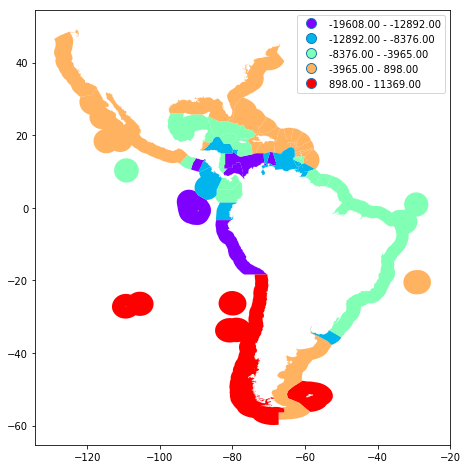

In [14]:
counties.plot(column= ('MEAN_' + str(Base_name)) , scheme = 'Fisher_Jenks', cmap='rainbow', figsize=(8,8), legend=True)
plt.show()